In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
df = pd.read_csv("mushroom_numerical.csv", sep=',')

In [3]:
data = df.iloc[:,0:22]
labels = df.iloc[:,22]

In [4]:
kf = KFold(n_splits=2, shuffle=True) #5 fores me 2 folds

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Euclidean metric and k tuning

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1743
           e       1.00      1.00      1.00      1079

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


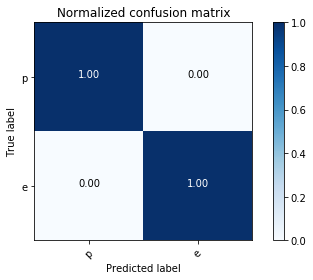

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1745
           e       1.00      1.00      1.00      1077

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


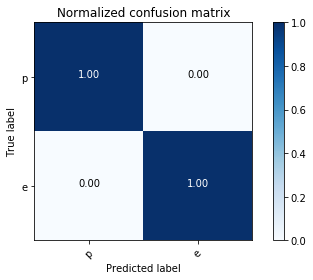

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1736
           e       1.00      1.00      1.00      1086

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9996456413890857


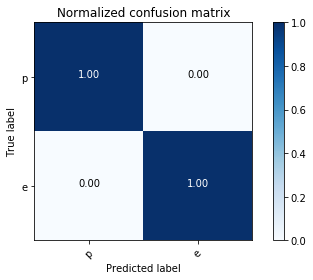

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1752
           e       1.00      1.00      1.00      1070

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


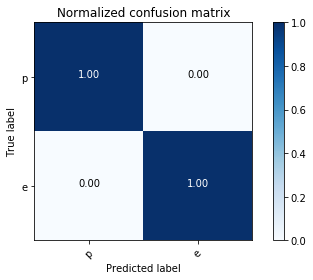

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1761
           e       1.00      1.00      1.00      1061

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


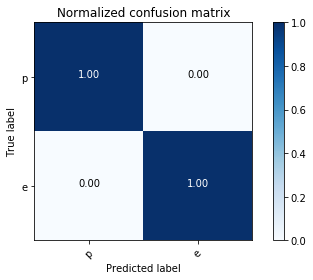

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1727
           e       1.00      1.00      1.00      1095

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


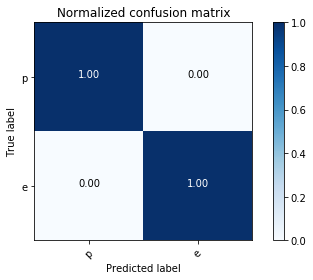

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1729
           e       1.00      1.00      1.00      1093

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


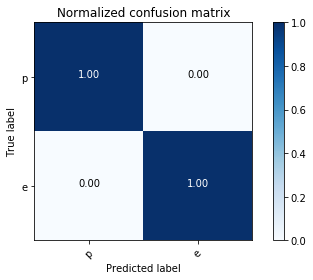

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1759
           e       1.00      1.00      1.00      1063

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9996456413890857


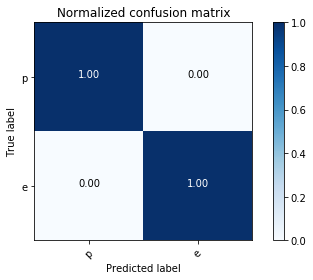

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1751
           e       1.00      1.00      1.00      1071

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


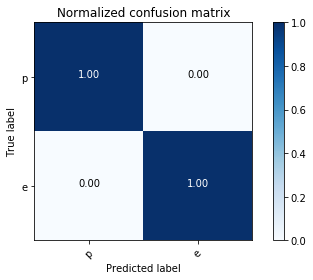

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1737
           e       1.00      1.00      1.00      1085

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


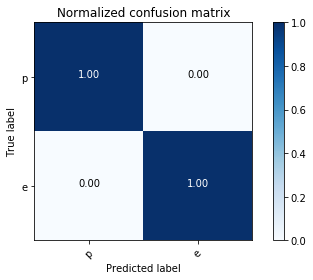

In [6]:
acc =[]
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()
mean_accuracy = sum(acc)/10  
print "mean accuracy", mean_accuracy

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1750
           e       1.00      1.00      1.00      1072

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9996456413890857


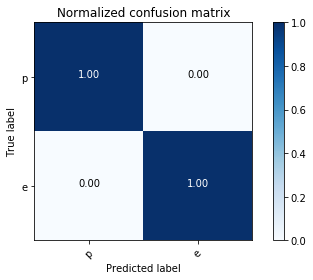

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1738
           e       1.00      1.00      1.00      1084

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


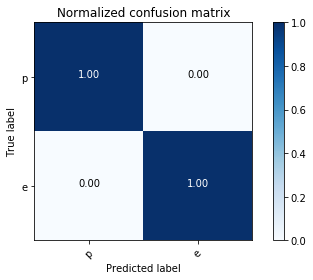

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1757
           e       1.00      1.00      1.00      1065

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


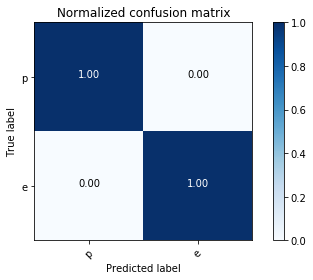

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1731
           e       1.00      1.00      1.00      1091

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9996456413890857


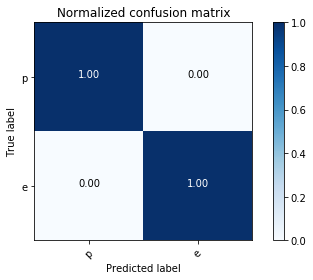

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1774
           e       1.00      0.99      1.00      1048

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9978738483345145


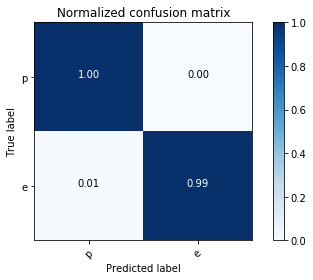

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1714
           e       1.00      1.00      1.00      1108

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


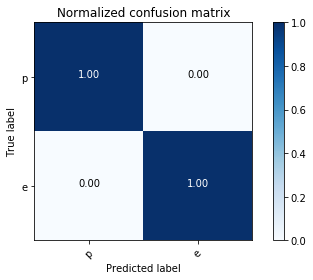

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1739
           e       1.00      1.00      1.00      1083

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9992912827781715


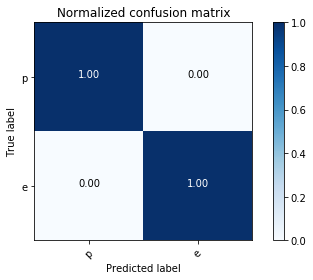

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1749
           e       1.00      1.00      1.00      1073

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


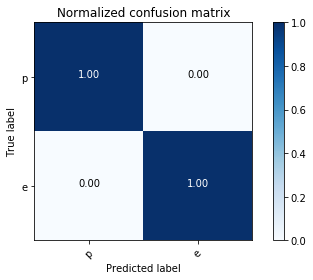

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1722
           e       1.00      1.00      1.00      1100

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


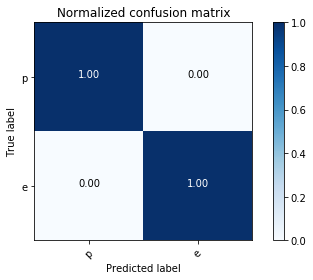

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1766
           e       1.00      0.99      1.00      1056

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9978738483345145


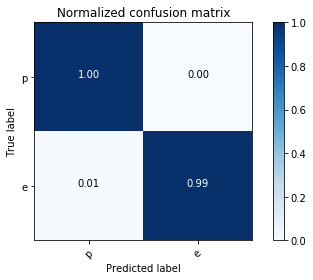

In [7]:
acc =[]
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()
mean_accuracy = sum(acc)/10  
print "mean accuracy", mean_accuracy

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1730
           e       1.00      1.00      1.00      1092

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9989369241672572


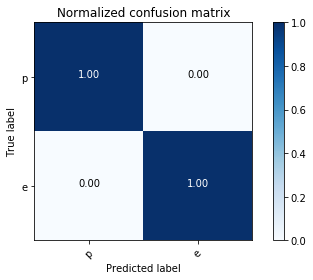

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1758
           e       1.00      0.99      1.00      1064

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9975194897236003


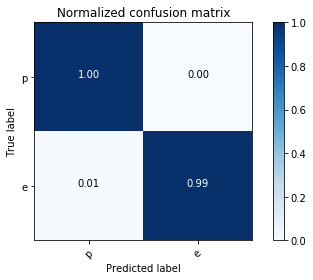

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1752
           e       1.00      0.99      1.00      1070

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9978738483345145


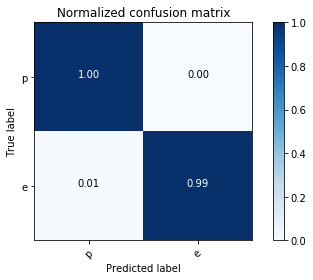

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1736
           e       1.00      0.99      1.00      1086

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9978738483345145


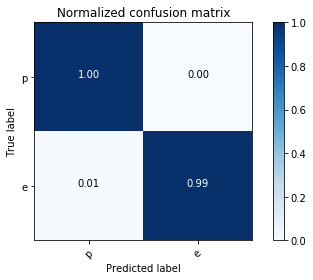

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1744
           e       1.00      1.00      1.00      1078

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9982282069454288


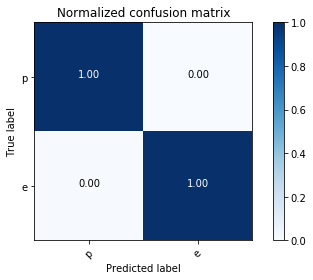

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1744
           e       1.00      0.99      1.00      1078

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9978738483345145


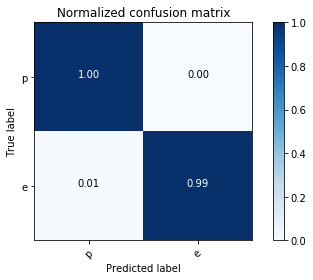

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1741
           e       1.00      0.99      1.00      1081

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.997165131112686


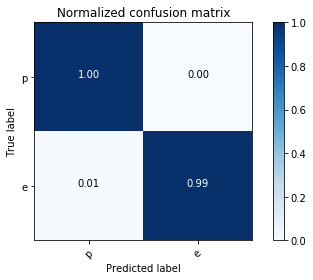

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1747
           e       1.00      1.00      1.00      1075

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9992912827781715


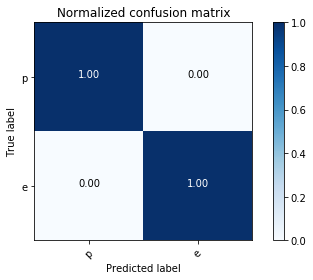

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1742
           e       1.00      1.00      1.00      1080

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9982282069454288


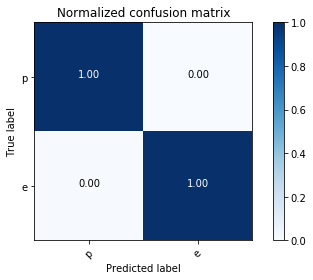

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1746
           e       1.00      1.00      1.00      1076

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9982282069454288


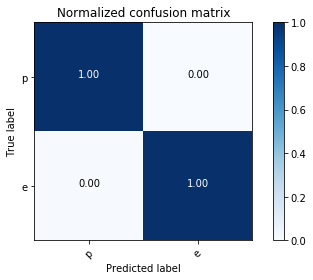

In [8]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.99      1.00      1.00      1743
           e       1.00      0.99      0.99      1079

   micro avg       0.99      0.99      0.99      2822
   macro avg       1.00      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9943302622253721


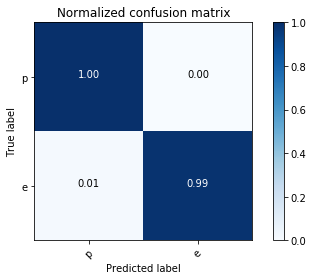

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1745
           e       1.00      1.00      1.00      1077

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9982282069454288


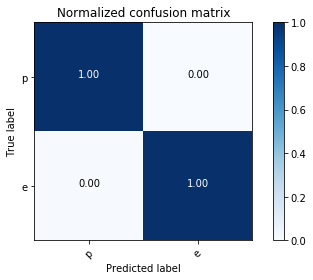

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1737
           e       1.00      1.00      1.00      1085

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9989369241672572


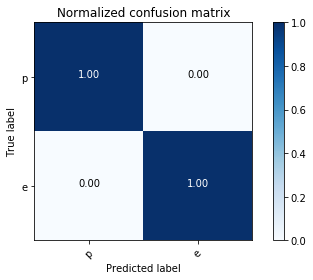

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.99      1.00      0.99      1751
           e       1.00      0.99      0.99      1071

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9936215450035436


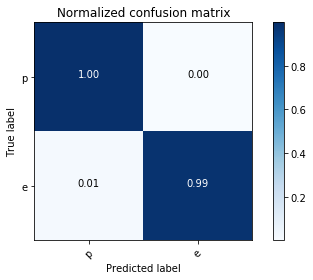

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1733
           e       1.00      0.99      0.99      1089

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9961020552799433


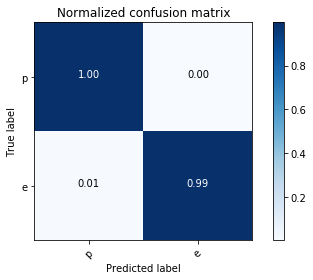

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.99      1.00      1.00      1755
           e       1.00      0.99      0.99      1067

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      0.99      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9957476966690291


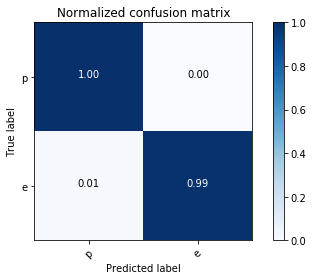

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.99      1.00      1.00      1725
           e       1.00      0.99      0.99      1097

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      0.99      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9953933380581148


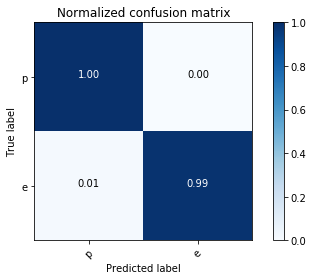

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1763
           e       1.00      1.00      1.00      1059

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9982282069454288


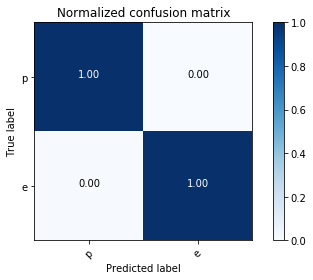

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.99      1.00      0.99      1757
           e       1.00      0.98      0.99      1065

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9932671863926293


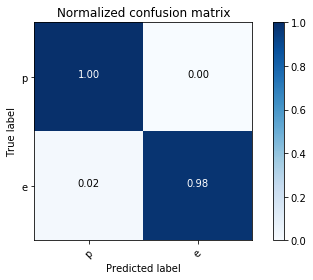

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1731
           e       1.00      1.00      1.00      1091

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9989369241672572


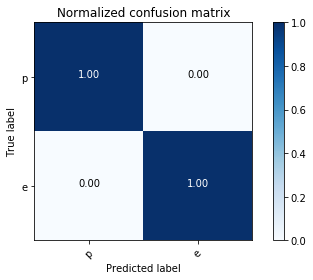

In [9]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.99      1.00      1.00      1782
           e       1.00      0.99      0.99      1040

   micro avg       0.99      0.99      0.99      2822
   macro avg       1.00      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9946846208362863


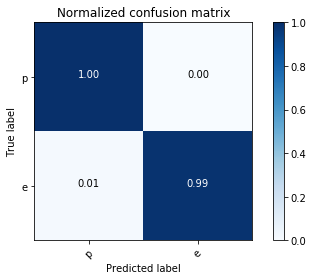

              precision    recall  f1-score   support

           p       0.99      1.00      0.99      1706
           e       1.00      0.98      0.99      1116

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9922041105598866


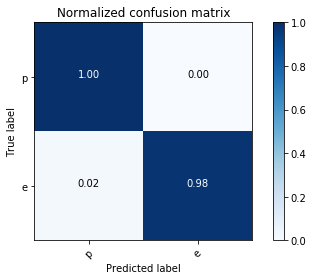

              precision    recall  f1-score   support

           p       0.99      1.00      0.99      1736
           e       1.00      0.98      0.99      1086

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9925584691708008


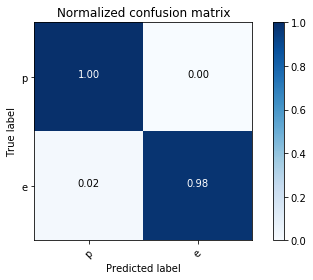

              precision    recall  f1-score   support

           p       0.99      1.00      1.00      1752
           e       1.00      0.99      0.99      1070

   micro avg       0.99      0.99      0.99      2822
   macro avg       1.00      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9946846208362863


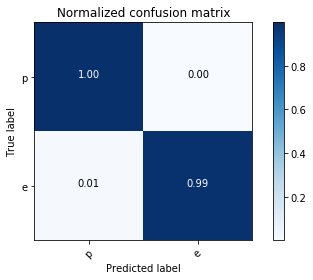

              precision    recall  f1-score   support

           p       0.99      1.00      0.99      1749
           e       1.00      0.98      0.99      1073

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9936215450035436


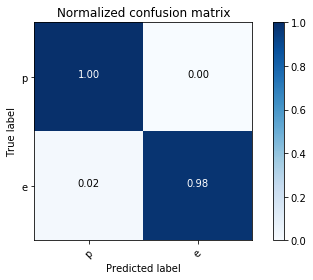

              precision    recall  f1-score   support

           p       0.99      1.00      0.99      1739
           e       1.00      0.98      0.99      1083

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9918497519489724


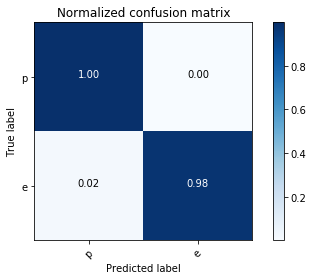

              precision    recall  f1-score   support

           p       0.99      1.00      1.00      1759
           e       1.00      0.98      0.99      1063

   micro avg       0.99      0.99      0.99      2822
   macro avg       1.00      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9943302622253721


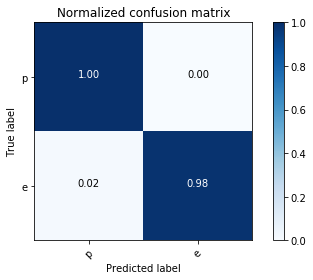

              precision    recall  f1-score   support

           p       0.99      1.00      0.99      1729
           e       1.00      0.98      0.99      1093

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9900779588944011


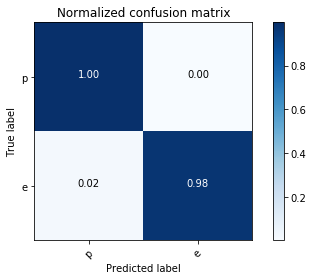

              precision    recall  f1-score   support

           p       0.98      1.00      0.99      1744
           e       1.00      0.97      0.99      1078

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9900779588944011


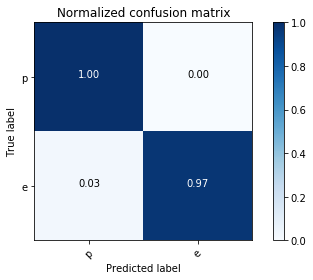

              precision    recall  f1-score   support

           p       0.99      1.00      1.00      1744
           e       1.00      0.98      0.99      1078

   micro avg       0.99      0.99      0.99      2822
   macro avg       1.00      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9939759036144579


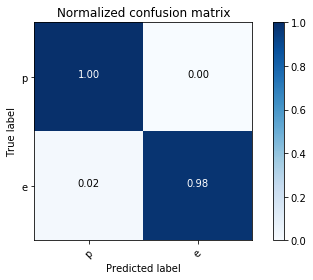

In [10]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.97      1.00      0.99      1773
           e       1.00      0.96      0.98      1049

   micro avg       0.98      0.98      0.98      2822
   macro avg       0.99      0.98      0.98      2822
weighted avg       0.98      0.98      0.98      2822

accuracy:  0.982636428065202


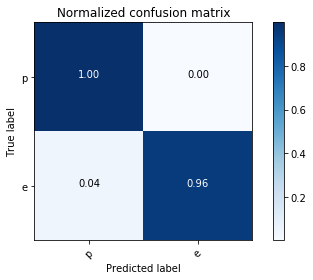

              precision    recall  f1-score   support

           p       0.99      1.00      0.99      1715
           e       1.00      0.98      0.99      1107

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9900779588944011


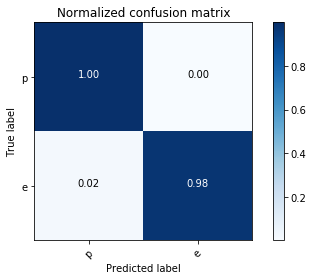

              precision    recall  f1-score   support

           p       0.96      1.00      0.98      1732
           e       1.00      0.94      0.97      1090

   micro avg       0.97      0.97      0.97      2822
   macro avg       0.98      0.97      0.97      2822
weighted avg       0.98      0.97      0.97      2822

accuracy:  0.9748405386250886


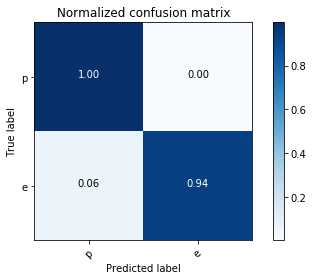

              precision    recall  f1-score   support

           p       0.99      1.00      0.99      1756
           e       1.00      0.98      0.99      1066

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9922041105598866


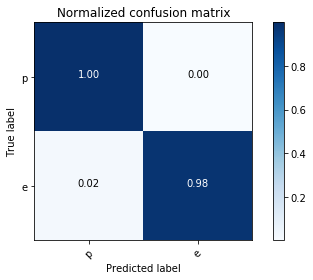

              precision    recall  f1-score   support

           p       0.99      1.00      0.99      1762
           e       1.00      0.98      0.99      1060

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9900779588944011


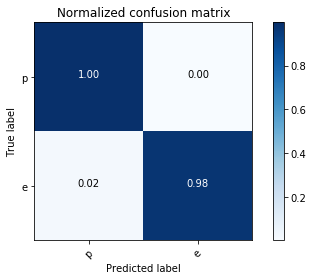

              precision    recall  f1-score   support

           p       0.97      1.00      0.99      1726
           e       1.00      0.96      0.98      1096

   micro avg       0.98      0.98      0.98      2822
   macro avg       0.99      0.98      0.98      2822
weighted avg       0.98      0.98      0.98      2822

accuracy:  0.984053862508859


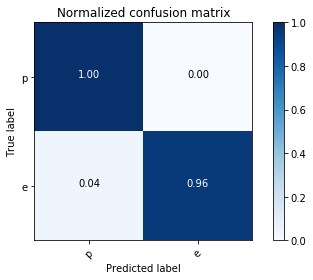

              precision    recall  f1-score   support

           p       0.97      1.00      0.98      1768
           e       1.00      0.95      0.97      1054

   micro avg       0.98      0.98      0.98      2822
   macro avg       0.98      0.97      0.98      2822
weighted avg       0.98      0.98      0.98      2822

accuracy:  0.9805102763997166


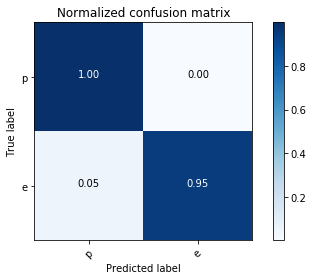

              precision    recall  f1-score   support

           p       0.98      1.00      0.99      1720
           e       1.00      0.97      0.98      1102

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.98      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9879518072289156


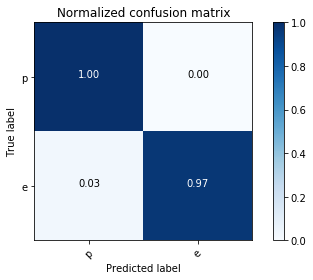

              precision    recall  f1-score   support

           p       0.98      1.00      0.99      1792
           e       1.00      0.97      0.99      1030

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9893692416725727


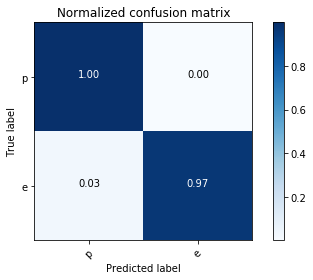

              precision    recall  f1-score   support

           p       0.97      1.00      0.98      1696
           e       1.00      0.96      0.98      1126

   micro avg       0.98      0.98      0.98      2822
   macro avg       0.98      0.98      0.98      2822
weighted avg       0.98      0.98      0.98      2822

accuracy:  0.9815733522324592


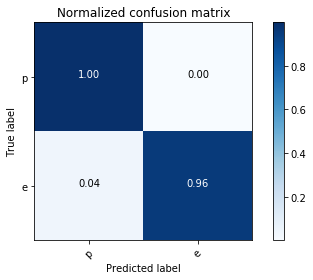

In [11]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.98      1.00      0.99      1757
           e       1.00      0.97      0.98      1065

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.98      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.986888731396173


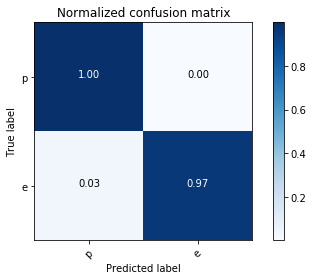

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.98      1.00      0.99      1731
           e       1.00      0.96      0.98      1091

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.98      0.98      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9858256555634302


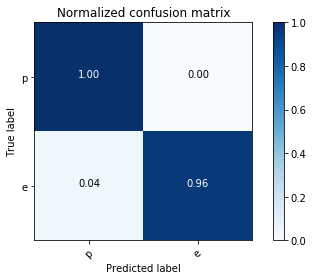

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.98      1.00      0.99      1720
           e       1.00      0.97      0.98      1102

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.98      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9875974486180015


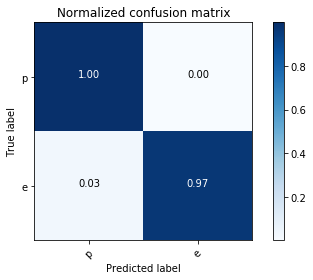

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.98      1.00      0.99      1768
           e       1.00      0.97      0.98      1054

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9883061658398299


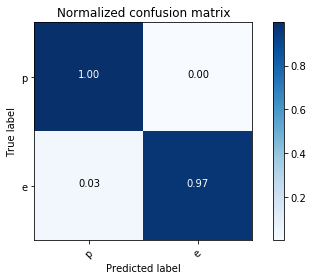

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.97      1.00      0.99      1714
           e       1.00      0.96      0.98      1108

   micro avg       0.98      0.98      0.98      2822
   macro avg       0.98      0.98      0.98      2822
weighted avg       0.98      0.98      0.98      2822

accuracy:  0.9819277108433735


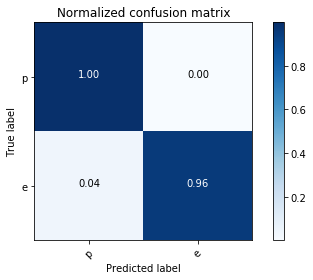

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.99      1.00      0.99      1774
           e       1.00      0.98      0.99      1048

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9904323175053154


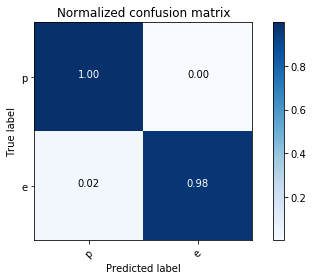

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.98      1.00      0.99      1739
           e       1.00      0.96      0.98      1083

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.98      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9861800141743444


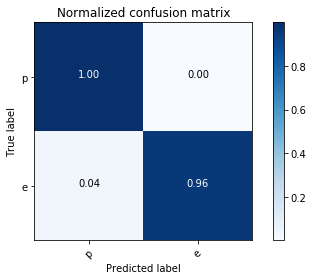

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.98      1.00      0.99      1749
           e       1.00      0.96      0.98      1073

   micro avg       0.98      0.98      0.98      2822
   macro avg       0.99      0.98      0.98      2822
weighted avg       0.98      0.98      0.98      2822

accuracy:  0.9844082211197732


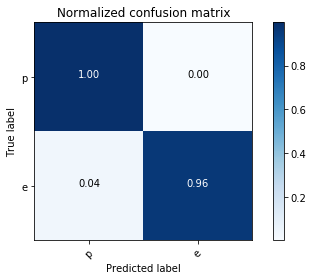

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.99      1.00      0.99      1739
           e       1.00      0.98      0.99      1083

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9911410347271439


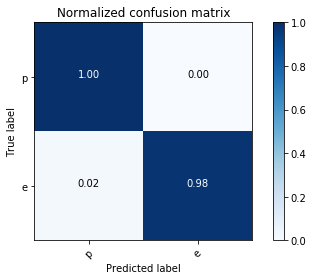

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.97      1.00      0.98      1749
           e       0.99      0.95      0.97      1073

   micro avg       0.98      0.98      0.98      2822
   macro avg       0.98      0.97      0.98      2822
weighted avg       0.98      0.98      0.98      2822

accuracy:  0.9783841247342311


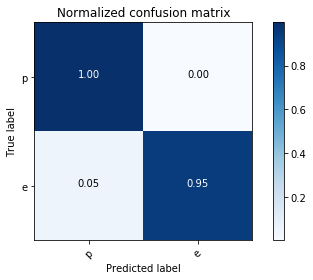

In [12]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.90      1.00      0.95      1742
           e       1.00      0.82      0.90      1080

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.95      0.91      0.92      2822
weighted avg       0.94      0.93      0.93      2822

accuracy:  0.9309000708717222


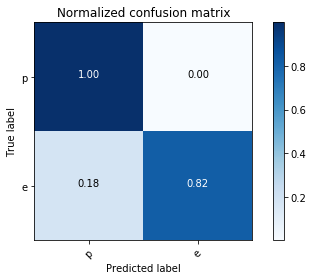

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.89      1.00      0.94      1746
           e       1.00      0.80      0.89      1076

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.95      0.90      0.92      2822
weighted avg       0.93      0.93      0.92      2822

accuracy:  0.9252303330970942


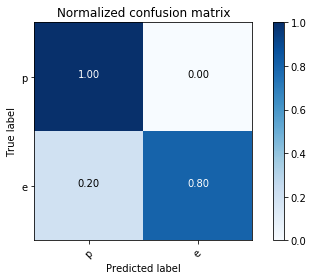

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.90      1.00      0.95      1734
           e       1.00      0.83      0.91      1088

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.95      0.91      0.93      2822
weighted avg       0.94      0.93      0.93      2822

accuracy:  0.9337349397590361


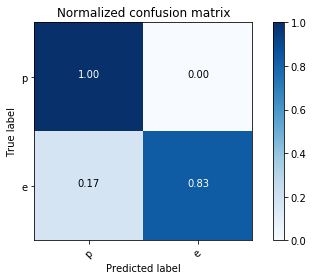

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.89      1.00      0.94      1754
           e       1.00      0.80      0.89      1068

   micro avg       0.92      0.92      0.92      2822
   macro avg       0.95      0.90      0.92      2822
weighted avg       0.93      0.92      0.92      2822

accuracy:  0.92487597448618


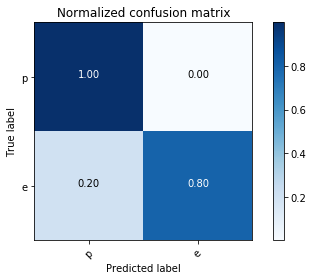

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.90      1.00      0.95      1759
           e       1.00      0.82      0.90      1063

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.95      0.91      0.92      2822
weighted avg       0.94      0.93      0.93      2822

accuracy:  0.9316087880935506


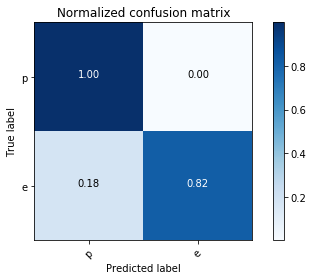

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.89      1.00      0.94      1729
           e       1.00      0.81      0.90      1093

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.95      0.91      0.92      2822
weighted avg       0.93      0.93      0.92      2822

accuracy:  0.9266477675407513


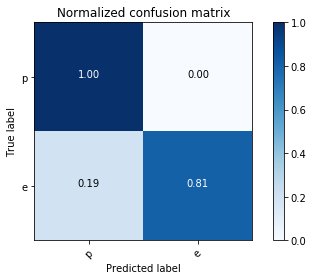

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.89      1.00      0.94      1722
           e       1.00      0.81      0.89      1100

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.95      0.90      0.92      2822
weighted avg       0.93      0.93      0.92      2822

accuracy:  0.9255846917080085


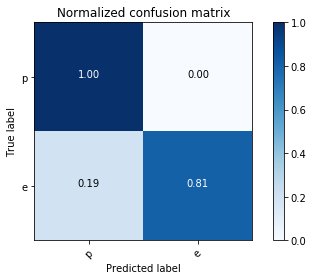

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.90      1.00      0.95      1766
           e       1.00      0.82      0.90      1056

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.95      0.91      0.92      2822
weighted avg       0.94      0.93      0.93      2822

accuracy:  0.9319631467044649


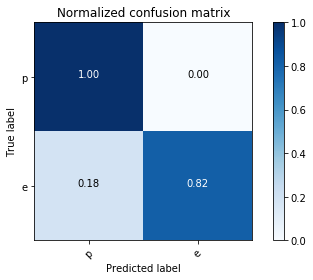

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.90      1.00      0.94      1734
           e       1.00      0.81      0.90      1088

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.95      0.91      0.92      2822
weighted avg       0.94      0.93      0.93      2822

accuracy:  0.9284195605953225


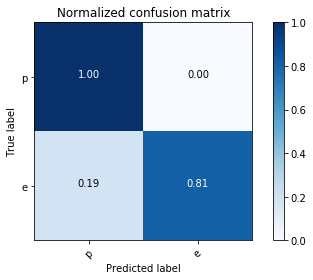

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.90      1.00      0.95      1754
           e       1.00      0.81      0.90      1068

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.95      0.91      0.92      2822
weighted avg       0.94      0.93      0.93      2822

accuracy:  0.9284195605953225


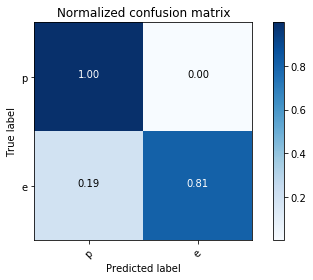

In [13]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.86      1.00      0.93      1761
           e       1.00      0.74      0.85      1061

   micro avg       0.90      0.90      0.90      2822
   macro avg       0.93      0.87      0.89      2822
weighted avg       0.91      0.90      0.90      2822

accuracy:  0.9014883061658399


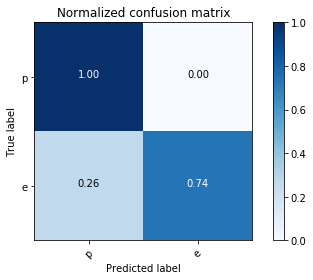

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.85      1.00      0.92      1727
           e       1.00      0.72      0.84      1095

   micro avg       0.89      0.89      0.89      2822
   macro avg       0.92      0.86      0.88      2822
weighted avg       0.91      0.89      0.89      2822

accuracy:  0.890148830616584


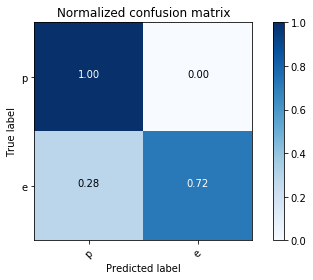

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.87      1.00      0.93      1753
           e       1.00      0.76      0.86      1069

   micro avg       0.91      0.91      0.91      2822
   macro avg       0.94      0.88      0.90      2822
weighted avg       0.92      0.91      0.90      2822

accuracy:  0.9078667611622963


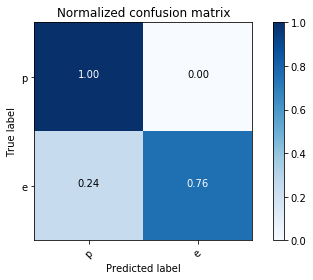

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.84      1.00      0.91      1735
           e       1.00      0.70      0.83      1087

   micro avg       0.89      0.89      0.89      2822
   macro avg       0.92      0.85      0.87      2822
weighted avg       0.90      0.89      0.88      2822

accuracy:  0.8855421686746988


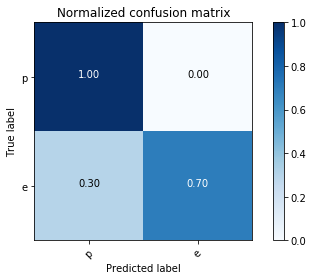

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.84      1.00      0.91      1728
           e       1.00      0.70      0.82      1094

   micro avg       0.88      0.88      0.88      2822
   macro avg       0.92      0.85      0.87      2822
weighted avg       0.90      0.88      0.88      2822

accuracy:  0.8837703756201276


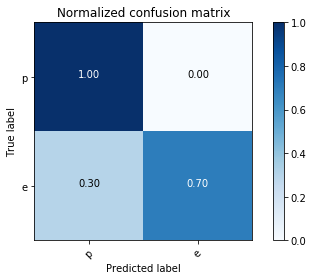

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.88      1.00      0.93      1760
           e       1.00      0.76      0.87      1062

   micro avg       0.91      0.91      0.91      2822
   macro avg       0.94      0.88      0.90      2822
weighted avg       0.92      0.91      0.91      2822

accuracy:  0.9110559886605244


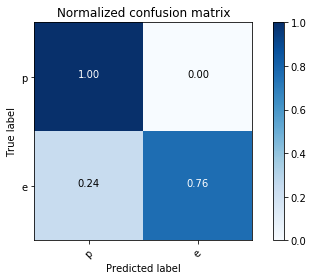

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.84      1.00      0.92      1738
           e       1.00      0.70      0.83      1084

   micro avg       0.89      0.89      0.89      2822
   macro avg       0.92      0.85      0.87      2822
weighted avg       0.90      0.89      0.88      2822

accuracy:  0.8858965272856131


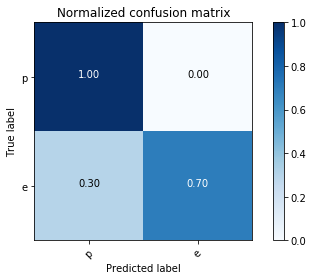

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.87      1.00      0.93      1750
           e       1.00      0.75      0.86      1072

   micro avg       0.91      0.91      0.91      2822
   macro avg       0.93      0.88      0.89      2822
weighted avg       0.92      0.91      0.90      2822

accuracy:  0.9050318922749823


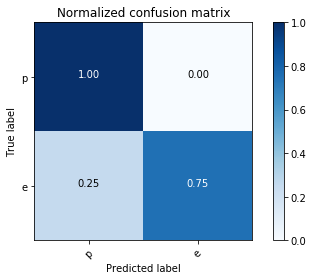

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.85      1.00      0.92      1731
           e       1.00      0.73      0.84      1091

   micro avg       0.90      0.90      0.90      2822
   macro avg       0.93      0.87      0.88      2822
weighted avg       0.91      0.90      0.89      2822

accuracy:  0.8958185683912119


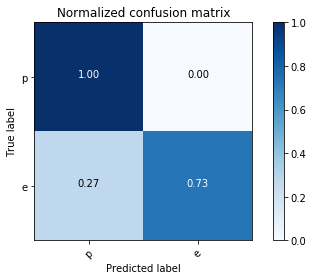

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.86      1.00      0.92      1757
           e       1.00      0.73      0.84      1065

   micro avg       0.90      0.90      0.90      2822
   macro avg       0.93      0.86      0.88      2822
weighted avg       0.91      0.90      0.89      2822

accuracy:  0.8972360028348689


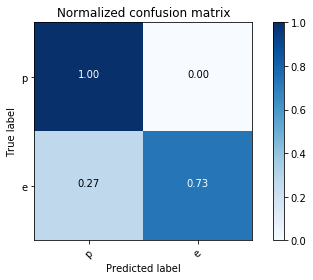

In [14]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

### Minkowski metric and k tunning

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1767
           e       1.00      1.00      1.00      1055

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


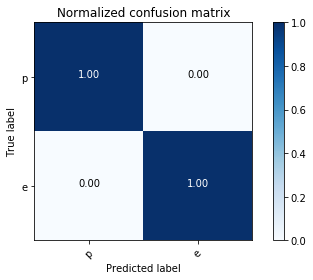

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1721
           e       1.00      1.00      1.00      1101

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


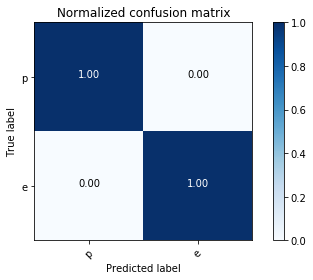

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1755
           e       1.00      1.00      1.00      1067

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


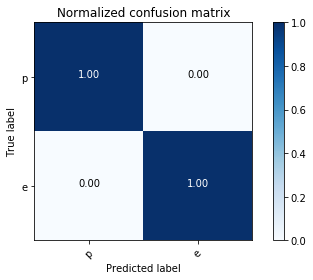

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1733
           e       1.00      1.00      1.00      1089

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


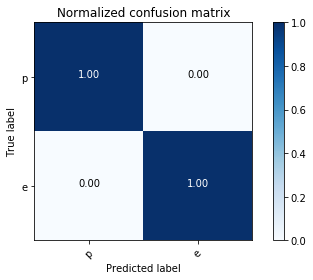

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1706
           e       1.00      1.00      1.00      1116

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


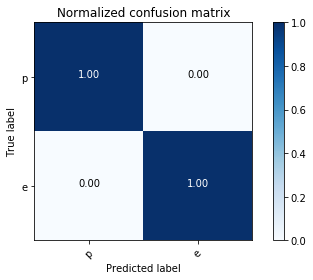

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1782
           e       1.00      1.00      1.00      1040

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


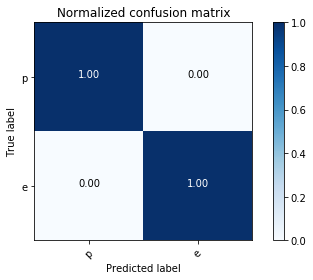

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1731
           e       1.00      1.00      1.00      1091

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


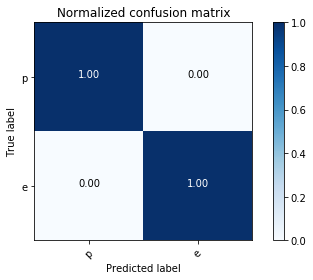

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1757
           e       1.00      1.00      1.00      1065

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


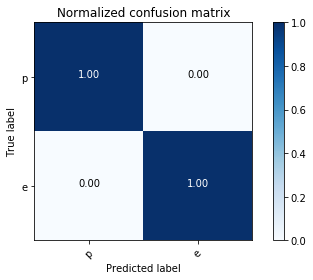

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1751
           e       1.00      1.00      1.00      1071

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


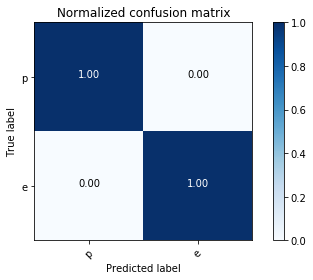

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1737
           e       1.00      1.00      1.00      1085

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


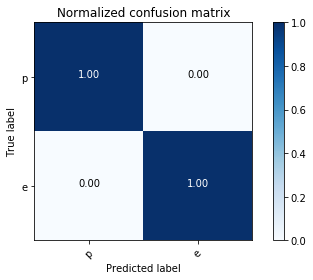

In [15]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1738
           e       1.00      1.00      1.00      1084

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


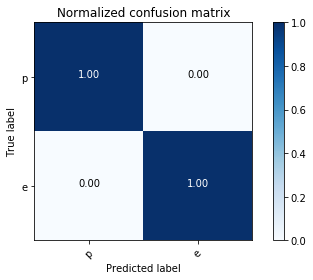

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1750
           e       1.00      0.99      1.00      1072

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9975194897236003


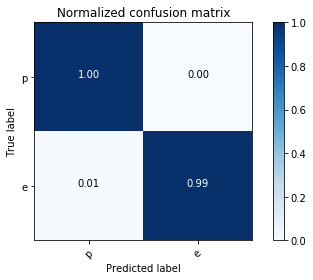

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1756
           e       1.00      1.00      1.00      1066

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


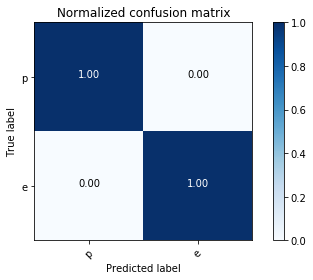

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1732
           e       1.00      1.00      1.00      1090

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


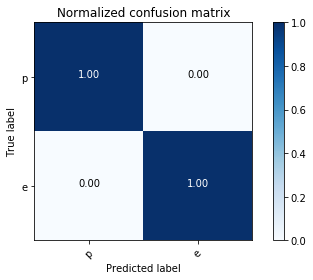

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1752
           e       1.00      1.00      1.00      1070

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


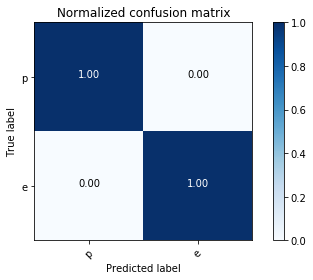

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1736
           e       1.00      1.00      1.00      1086

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9996456413890857


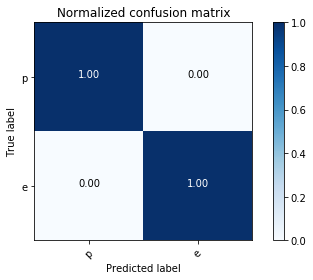

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1792
           e       1.00      1.00      1.00      1030

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9996456413890857


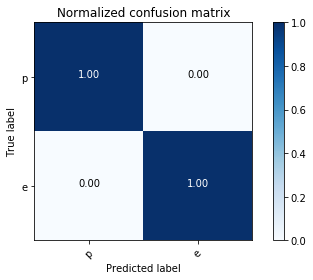

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1696
           e       1.00      1.00      1.00      1126

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


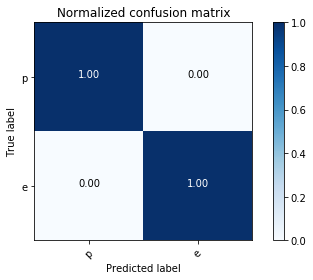

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1726
           e       1.00      1.00      1.00      1096

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


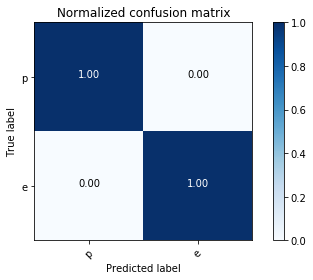

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1762
           e       1.00      1.00      1.00      1060

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9992912827781715


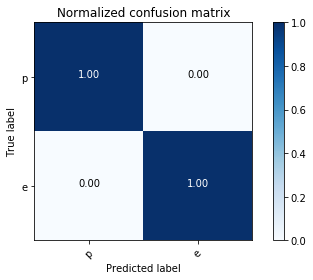

In [16]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1713
           e       1.00      0.99      1.00      1109

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9978738483345145


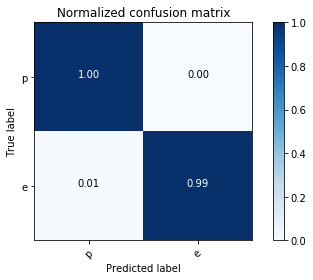

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1775
           e       1.00      1.00      1.00      1047

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9985825655563431


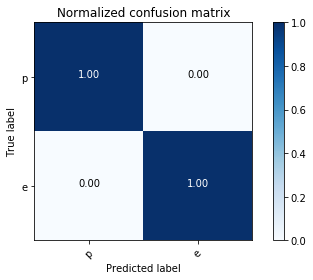

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1710
           e       1.00      0.99      1.00      1112

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9978738483345145


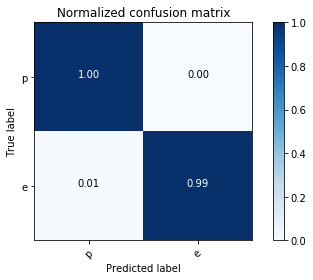

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1778
           e       1.00      1.00      1.00      1044

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9982282069454288


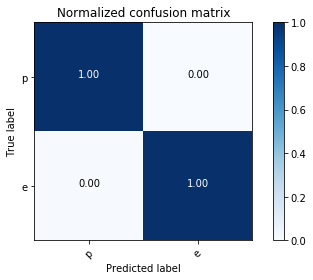

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1729
           e       1.00      0.99      1.00      1093

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9975194897236003


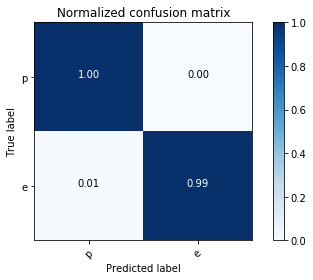

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1759
           e       1.00      1.00      1.00      1063

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


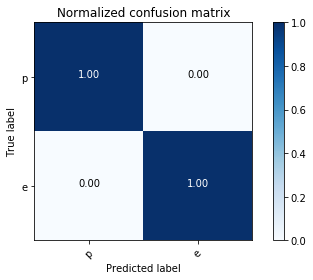

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1747
           e       1.00      1.00      1.00      1075

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9985825655563431


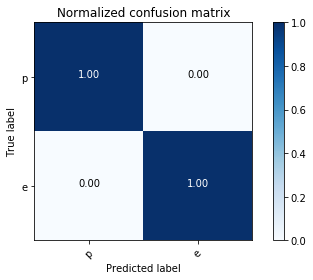

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1741
           e       1.00      0.99      1.00      1081

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9978738483345145


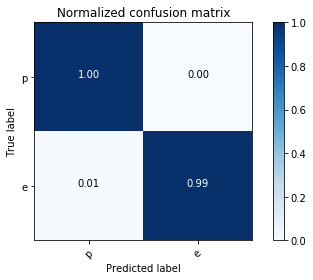

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1757
           e       1.00      1.00      1.00      1065

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9982282069454288


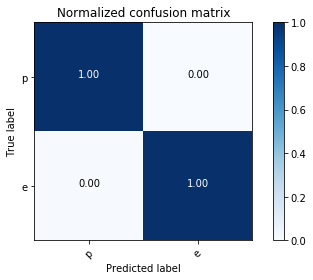

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1731
           e       1.00      0.99      1.00      1091

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9978738483345145


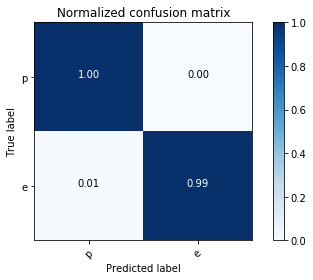

In [17]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1770
           e       1.00      0.99      1.00      1052

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9975194897236003


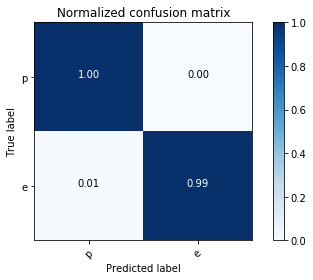

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.99      1.00      0.99      1718
           e       1.00      0.98      0.99      1104

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9936215450035436


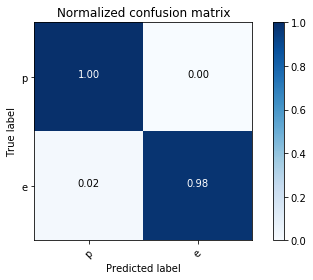

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1750
           e       1.00      1.00      1.00      1072

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9985825655563431


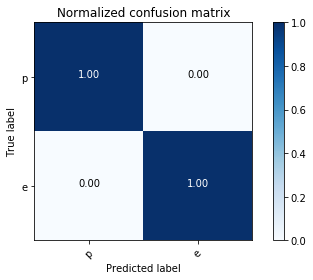

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.99      1.00      1.00      1738
           e       1.00      0.98      0.99      1084

   micro avg       0.99      0.99      0.99      2822
   macro avg       1.00      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9939759036144579


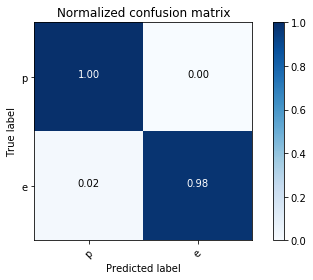

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.99      1.00      0.99      1739
           e       1.00      0.98      0.99      1083

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9929128277817151


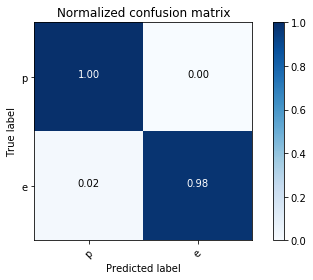

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1749
           e       1.00      1.00      1.00      1073

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9975194897236003


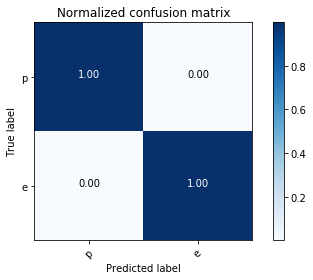

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.99      1.00      1.00      1751
           e       1.00      0.99      1.00      1071

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9968107725017717


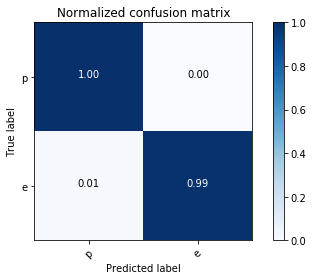

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1737
           e       1.00      0.99      1.00      1085

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9975194897236003


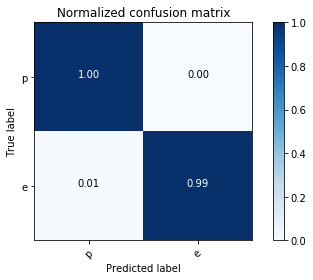

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1802
           e       1.00      0.99      0.99      1020

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      0.99      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9957476966690291


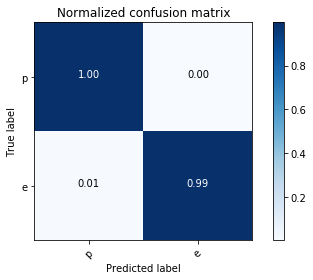

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.99      1.00      0.99      1686
           e       1.00      0.99      0.99      1136

   micro avg       0.99      0.99      0.99      2822
   macro avg       1.00      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9939759036144579


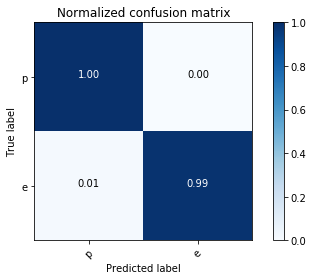

In [18]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.99      1.00      0.99      1733
           e       1.00      0.98      0.99      1089

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9918497519489724


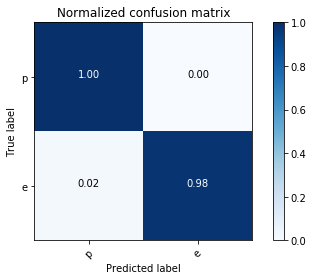

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1755
           e       1.00      0.99      1.00      1067

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.997165131112686


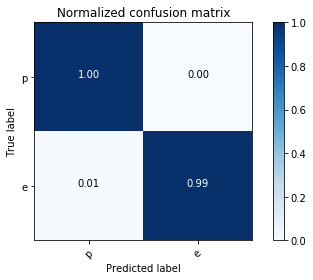

              precision    recall  f1-score   support

           p       0.99      1.00      1.00      1753
           e       1.00      0.99      0.99      1069

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      0.99      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9953933380581148


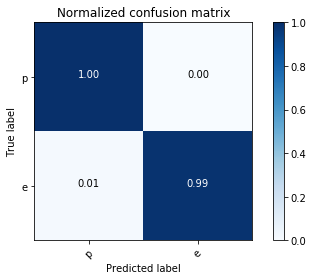

              precision    recall  f1-score   support

           p       0.99      1.00      0.99      1735
           e       1.00      0.98      0.99      1087

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9929128277817151


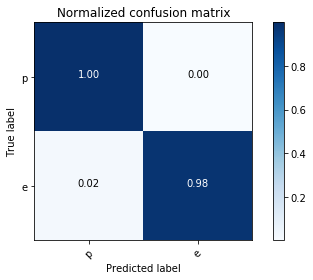

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1746
           e       1.00      1.00      1.00      1076

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9978738483345145


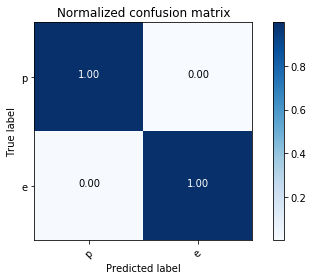

              precision    recall  f1-score   support

           p       0.99      1.00      0.99      1742
           e       1.00      0.98      0.99      1080

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9911410347271439


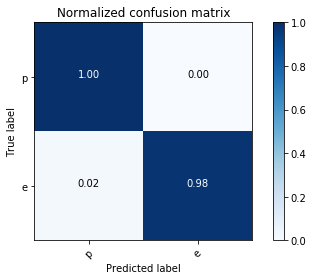

              precision    recall  f1-score   support

           p       0.99      1.00      0.99      1728
           e       1.00      0.98      0.99      1094

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9904323175053154


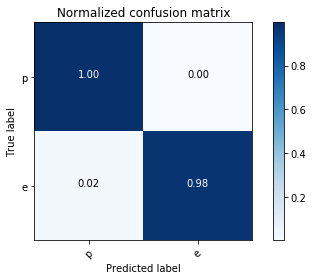

              precision    recall  f1-score   support

           p       0.99      1.00      1.00      1760
           e       1.00      0.98      0.99      1062

   micro avg       0.99      0.99      0.99      2822
   macro avg       1.00      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9939759036144579


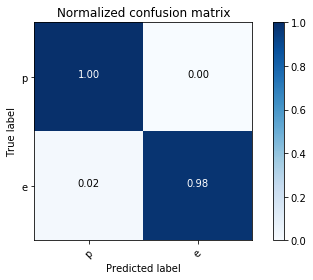

              precision    recall  f1-score   support

           p       0.99      1.00      0.99      1743
           e       1.00      0.98      0.99      1079

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9925584691708008


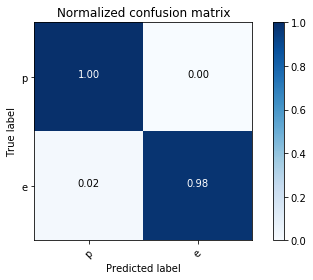

              precision    recall  f1-score   support

           p       0.99      1.00      1.00      1745
           e       1.00      0.99      0.99      1077

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      0.99      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9953933380581148


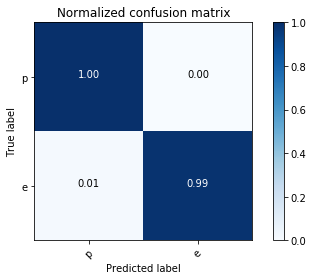

In [19]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.97      1.00      0.98      1703
           e       1.00      0.95      0.97      1119

   micro avg       0.98      0.98      0.98      2822
   macro avg       0.98      0.97      0.98      2822
weighted avg       0.98      0.98      0.98      2822

accuracy:  0.979801559177888


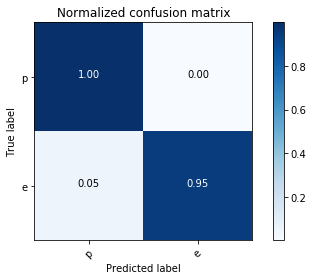

              precision    recall  f1-score   support

           p       0.98      1.00      0.99      1785
           e       1.00      0.96      0.98      1037

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.98      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9865343727852587


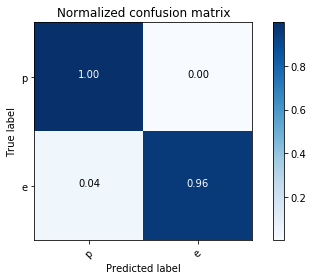

              precision    recall  f1-score   support

           p       0.97      1.00      0.98      1720
           e       1.00      0.95      0.97      1102

   micro avg       0.98      0.98      0.98      2822
   macro avg       0.98      0.97      0.98      2822
weighted avg       0.98      0.98      0.98      2822

accuracy:  0.9790928419560595


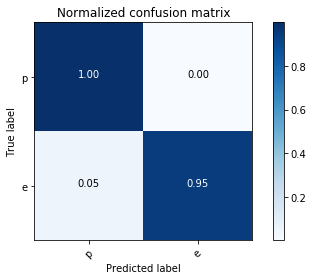

              precision    recall  f1-score   support

           p       0.99      1.00      1.00      1768
           e       1.00      0.99      0.99      1054

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9939759036144579


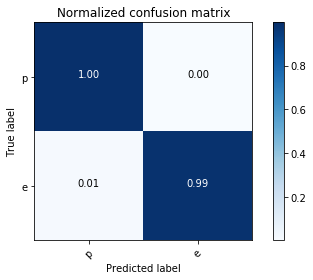

              precision    recall  f1-score   support

           p       0.97      1.00      0.99      1760
           e       1.00      0.95      0.97      1062

   micro avg       0.98      0.98      0.98      2822
   macro avg       0.99      0.98      0.98      2822
weighted avg       0.98      0.98      0.98      2822

accuracy:  0.981218993621545


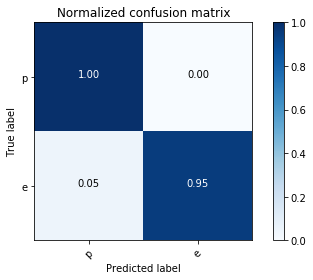

              precision    recall  f1-score   support

           p       0.99      1.00      0.99      1728
           e       1.00      0.98      0.99      1094

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9904323175053154


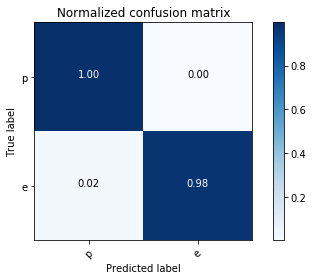

              precision    recall  f1-score   support

           p       0.98      1.00      0.99      1759
           e       1.00      0.96      0.98      1063

   micro avg       0.98      0.98      0.98      2822
   macro avg       0.99      0.98      0.98      2822
weighted avg       0.98      0.98      0.98      2822

accuracy:  0.9833451452870304


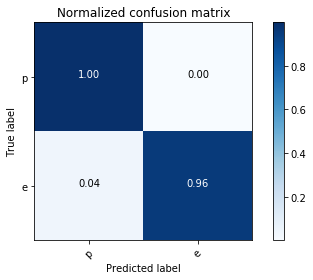

              precision    recall  f1-score   support

           p       0.98      1.00      0.99      1729
           e       1.00      0.96      0.98      1093

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.98      0.98      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9854712969525159


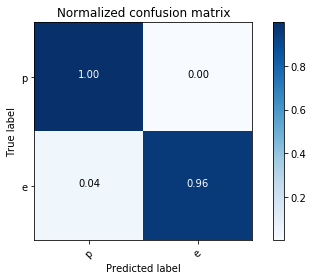

              precision    recall  f1-score   support

           p       0.97      1.00      0.98      1722
           e       1.00      0.95      0.97      1100

   micro avg       0.98      0.98      0.98      2822
   macro avg       0.98      0.97      0.98      2822
weighted avg       0.98      0.98      0.98      2822

accuracy:  0.9790928419560595


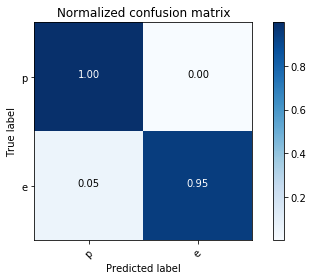

              precision    recall  f1-score   support

           p       0.99      1.00      0.99      1766
           e       1.00      0.98      0.99      1056

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9900779588944011


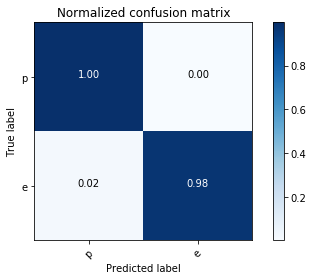

In [20]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.95      1.00      0.98      1725
           e       1.00      0.93      0.96      1097

   micro avg       0.97      0.97      0.97      2822
   macro avg       0.97      0.96      0.97      2822
weighted avg       0.97      0.97      0.97      2822

accuracy:  0.9691708008504607


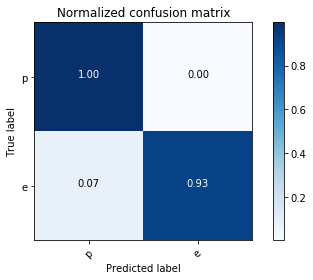

              precision    recall  f1-score   support

           p       0.96      1.00      0.98      1763
           e       1.00      0.92      0.96      1059

   micro avg       0.97      0.97      0.97      2822
   macro avg       0.98      0.96      0.97      2822
weighted avg       0.97      0.97      0.97      2822

accuracy:  0.9705882352941176


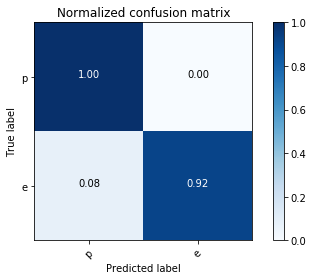

              precision    recall  f1-score   support

           p       0.96      1.00      0.98      1746
           e       1.00      0.94      0.97      1076

   micro avg       0.97      0.97      0.97      2822
   macro avg       0.98      0.97      0.97      2822
weighted avg       0.97      0.97      0.97      2822

accuracy:  0.97413182140326


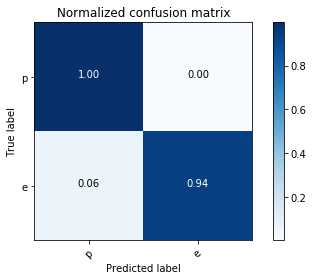

              precision    recall  f1-score   support

           p       0.95      1.00      0.97      1742
           e       1.00      0.91      0.95      1080

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.97      0.95      0.96      2822
weighted avg       0.97      0.96      0.96      2822

accuracy:  0.9645641389085755


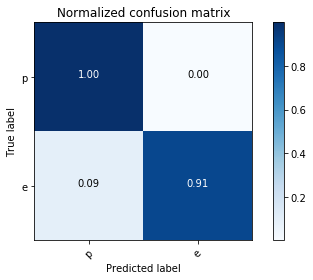

              precision    recall  f1-score   support

           p       0.94      1.00      0.97      1738
           e       1.00      0.89      0.94      1084

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.97      0.95      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9588944011339475


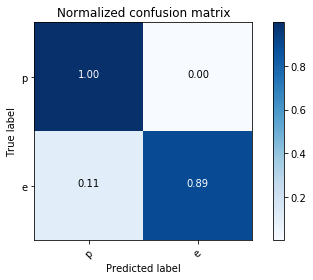

              precision    recall  f1-score   support

           p       0.97      1.00      0.98      1750
           e       1.00      0.95      0.97      1072

   micro avg       0.98      0.98      0.98      2822
   macro avg       0.98      0.97      0.98      2822
weighted avg       0.98      0.98      0.98      2822

accuracy:  0.9776754075124026


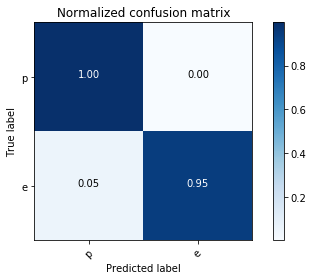

              precision    recall  f1-score   support

           p       0.94      1.00      0.97      1740
           e       1.00      0.90      0.95      1082

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.97      0.95      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.961020552799433


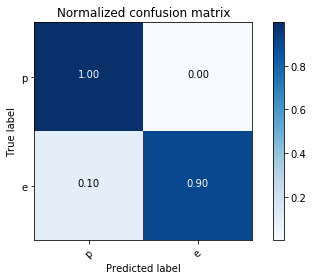

              precision    recall  f1-score   support

           p       0.97      1.00      0.98      1748
           e       1.00      0.95      0.97      1074

   micro avg       0.98      0.98      0.98      2822
   macro avg       0.98      0.97      0.98      2822
weighted avg       0.98      0.98      0.98      2822

accuracy:  0.9783841247342311


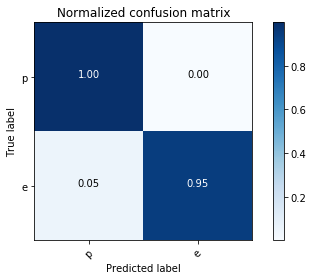

              precision    recall  f1-score   support

           p       0.95      1.00      0.97      1749
           e       1.00      0.92      0.95      1073

   micro avg       0.97      0.97      0.97      2822
   macro avg       0.97      0.96      0.96      2822
weighted avg       0.97      0.97      0.97      2822

accuracy:  0.9670446491849752


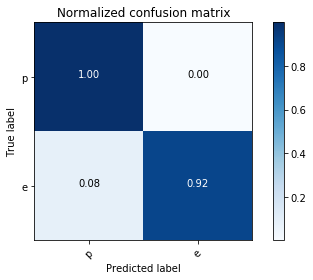

              precision    recall  f1-score   support

           p       0.95      1.00      0.98      1739
           e       1.00      0.92      0.96      1083

   micro avg       0.97      0.97      0.97      2822
   macro avg       0.98      0.96      0.97      2822
weighted avg       0.97      0.97      0.97      2822

accuracy:  0.9702338766832034


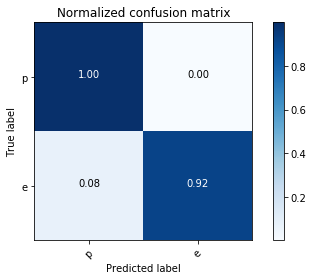

In [21]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.90      1.00      0.95      1744
           e       1.00      0.81      0.90      1078

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.95      0.91      0.92      2822
weighted avg       0.94      0.93      0.93      2822

accuracy:  0.9284195605953225


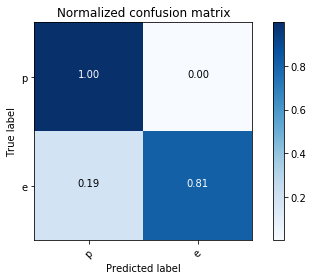

              precision    recall  f1-score   support

           p       0.89      1.00      0.94      1744
           e       1.00      0.81      0.89      1078

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.95      0.90      0.92      2822
weighted avg       0.93      0.93      0.92      2822

accuracy:  0.9255846917080085


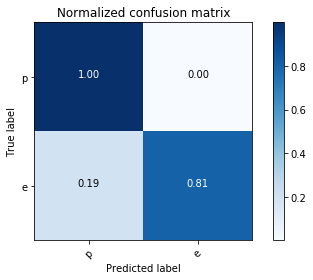

              precision    recall  f1-score   support

           p       0.89      1.00      0.94      1758
           e       1.00      0.80      0.89      1064

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.95      0.90      0.92      2822
weighted avg       0.93      0.93      0.92      2822

accuracy:  0.9252303330970942


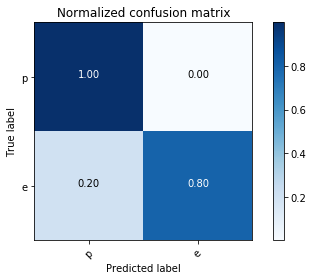

              precision    recall  f1-score   support

           p       0.90      1.00      0.95      1730
           e       1.00      0.82      0.90      1092

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.95      0.91      0.92      2822
weighted avg       0.94      0.93      0.93      2822

accuracy:  0.9312544294826365


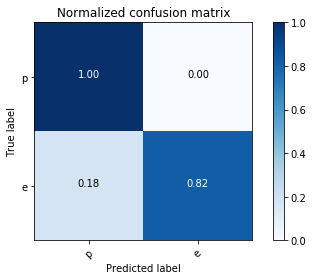

              precision    recall  f1-score   support

           p       0.90      1.00      0.95      1748
           e       1.00      0.82      0.90      1074

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.95      0.91      0.93      2822
weighted avg       0.94      0.93      0.93      2822

accuracy:  0.9326718639262934


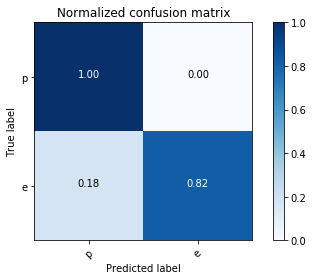

              precision    recall  f1-score   support

           p       0.89      1.00      0.94      1740
           e       1.00      0.79      0.88      1082

   micro avg       0.92      0.92      0.92      2822
   macro avg       0.94      0.90      0.91      2822
weighted avg       0.93      0.92      0.92      2822

accuracy:  0.9195605953224664


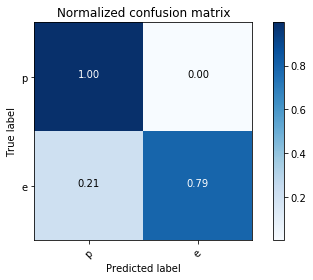

              precision    recall  f1-score   support

           p       0.90      1.00      0.95      1756
           e       1.00      0.81      0.90      1066

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.95      0.91      0.92      2822
weighted avg       0.94      0.93      0.93      2822

accuracy:  0.9291282778171509


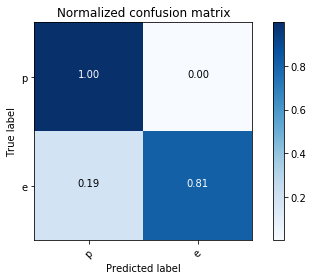

              precision    recall  f1-score   support

           p       0.89      1.00      0.94      1732
           e       1.00      0.80      0.89      1090

   micro avg       0.92      0.92      0.92      2822
   macro avg       0.94      0.90      0.91      2822
weighted avg       0.93      0.92      0.92      2822

accuracy:  0.9216867469879518


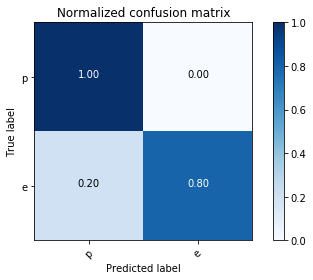

              precision    recall  f1-score   support

           p       0.90      1.00      0.95      1772
           e       1.00      0.80      0.89      1050

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.95      0.90      0.92      2822
weighted avg       0.93      0.93      0.93      2822

accuracy:  0.9270021261516654


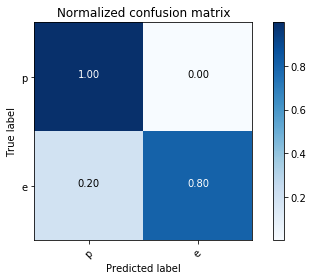

              precision    recall  f1-score   support

           p       0.90      1.00      0.94      1716
           e       1.00      0.82      0.90      1106

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.95      0.91      0.92      2822
weighted avg       0.94      0.93      0.93      2822

accuracy:  0.9291282778171509


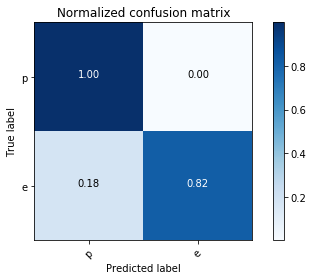

In [22]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.84      1.00      0.91      1747
           e       1.00      0.70      0.82      1075

   micro avg       0.88      0.88      0.88      2822
   macro avg       0.92      0.85      0.87      2822
weighted avg       0.90      0.88      0.88      2822

accuracy:  0.884479092841956


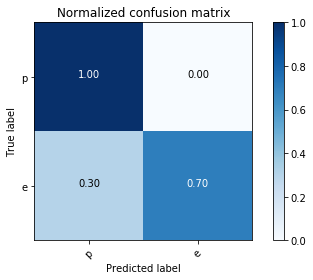

              precision    recall  f1-score   support

           p       0.87      1.00      0.93      1741
           e       1.00      0.76      0.86      1081

   micro avg       0.91      0.91      0.91      2822
   macro avg       0.93      0.88      0.90      2822
weighted avg       0.92      0.91      0.90      2822

accuracy:  0.9064493267186393


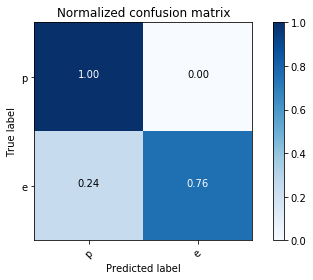

              precision    recall  f1-score   support

           p       0.88      1.00      0.94      1779
           e       1.00      0.78      0.87      1043

   micro avg       0.92      0.92      0.92      2822
   macro avg       0.94      0.89      0.91      2822
weighted avg       0.93      0.92      0.91      2822

accuracy:  0.9170800850460666


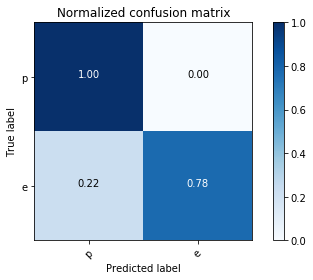

              precision    recall  f1-score   support

           p       0.83      1.00      0.91      1709
           e       1.00      0.69      0.81      1113

   micro avg       0.88      0.88      0.88      2822
   macro avg       0.92      0.84      0.86      2822
weighted avg       0.90      0.88      0.87      2822

accuracy:  0.8766832034018427


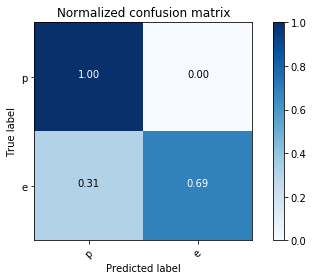

              precision    recall  f1-score   support

           p       0.85      1.00      0.92      1727
           e       1.00      0.72      0.84      1095

   micro avg       0.89      0.89      0.89      2822
   macro avg       0.92      0.86      0.88      2822
weighted avg       0.91      0.89      0.89      2822

accuracy:  0.8908575478384124


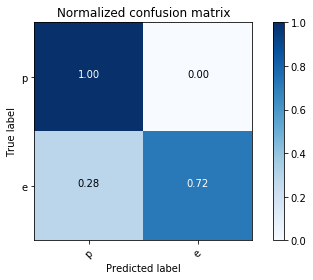

              precision    recall  f1-score   support

           p       0.86      1.00      0.92      1761
           e       1.00      0.73      0.84      1061

   micro avg       0.90      0.90      0.90      2822
   macro avg       0.93      0.86      0.88      2822
weighted avg       0.91      0.90      0.89      2822

accuracy:  0.8975903614457831


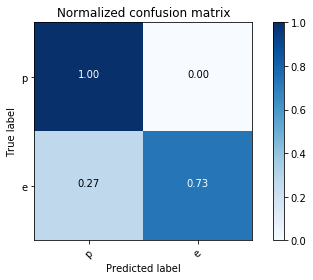

              precision    recall  f1-score   support

           p       0.85      1.00      0.92      1733
           e       1.00      0.72      0.84      1089

   micro avg       0.89      0.89      0.89      2822
   macro avg       0.93      0.86      0.88      2822
weighted avg       0.91      0.89      0.89      2822

accuracy:  0.892983699503898


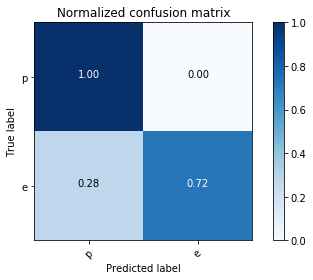

              precision    recall  f1-score   support

           p       0.86      1.00      0.93      1755
           e       1.00      0.73      0.85      1067

   micro avg       0.90      0.90      0.90      2822
   macro avg       0.93      0.87      0.89      2822
weighted avg       0.91      0.90      0.90      2822

accuracy:  0.8993621545003544


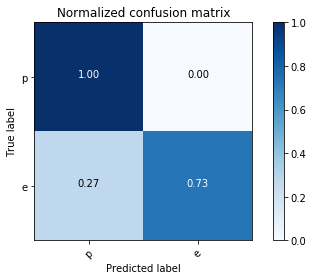

              precision    recall  f1-score   support

           p       0.85      1.00      0.92      1738
           e       1.00      0.71      0.83      1084

   micro avg       0.89      0.89      0.89      2822
   macro avg       0.92      0.85      0.87      2822
weighted avg       0.91      0.89      0.88      2822

accuracy:  0.8880226789510985


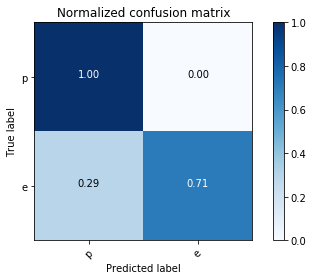

              precision    recall  f1-score   support

           p       0.86      1.00      0.93      1750
           e       1.00      0.74      0.85      1072

   micro avg       0.90      0.90      0.90      2822
   macro avg       0.93      0.87      0.89      2822
weighted avg       0.91      0.90      0.90      2822

accuracy:  0.9014883061658399


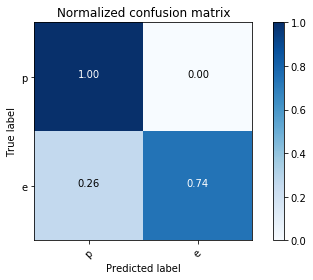

In [23]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()